In [1]:

# Environment Setup
#%pip install importlib_metadata --force-reinstall
#%pip install keras
#%env SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True
#%pip install wfdb
#%pip install tqdm
# %pip install keras-tuner


In [2]:
# Required Libraries
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
tf.get_logger().setLevel('ERROR')
import keras_tuner as kt
from sklearn.model_selection import train_test_split
import wfdb
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
import seaborn as sns

2023-12-10 21:05:36.194090: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-10 21:05:36.237734: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Check GPU Availability
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
!nvidia-smi

Num GPUs Available:  4
Sun Dec 10 21:05:39 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.30.02              Driver Version: 530.30.02    CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                        On | 00000000:60:00.0 Off |                    0 |
| N/A   60C    P0               29W /  70W|      4MiB / 15360MiB |      3%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+--

# Data Collection

Description of Datasets Used:
 - CHF-RR Dataset: Congestive heart failure RR interval database. It comprised patients with heart failure. This dataset contained records of 29 patients from CHF201 to CHF229.
 - NSR-RR Dataset: Normal sinus rhythm RR interval database. This dataset had 54 normal sinus rhythm recordings ranging in age from 28 to 76. Records from NSR001 through NSR054 of 54 patients were available.
 
 
Both datasets were provided by PhysioBank.

In [4]:
# Data Collection

# Description of Datasets Used:
# CHF-RR Dataset: Congestive heart failure RR interval database. It comprised patients with heart failure. 
# This dataset contained records of 29 patients from CHF201 to CHF229.
# NSR-RR Dataset: Normal sinus rhythm RR interval database. This dataset had 54 normal sinus rhythm recordings 
# ranging in age from 28 to 76. Records from NSR001 through NSR054 of 54 patients were available.
# Both datasets were provided by PhysioBank.

# Downloading Data

# Function to download a database from PhysioBank
def download(database):
    """
    Downloads the specified database from PhysioBank and saves it in the current working directory.

    Parameters:
    database (str): Name of the database to download.
    """
    cwd = os.getcwd()
    dl_dir = os.path.join(cwd, database)
    wfdb.dl_database(database, dl_dir=dl_dir)
    print(f"Downloaded {database} to {dl_dir}")
    display(os.listdir(dl_dir))

# Display available databases from PhysioBank
dbs = wfdb.get_dbs()
print("Available Databases from PhysioBank:")
display(dbs)

# Uncomment the following lines to download specific datasets
download('nsrdb')  # Download Normal Sinus Rhythm RR Interval Database
download('chfdb')  # Download Congestive Heart Failure RR Interval Database


Available Databases from PhysioBank:


[['aami-ec13', 'ANSI/AAMI EC13 Test Waveforms'],
 ['accelerometry-walk-climb-drive',
  'Labeled raw accelerometry data captured during walking, stair climbing and driving'],
 ['actes-cycloergometer-exercise',
  'Cardiorespiratory measurement from graded cycloergometer exercise testing'],
 ['adfecgdb', 'Abdominal and Direct Fetal ECG Database'],
 ['afdb', 'MIT-BIH Atrial Fibrillation Database'],
 ['afpdb', 'PAF Prediction Challenge Database'],
 ['aftdb', 'AF Termination Challenge Database'],
 ['ahadb', 'AHA Database Sample Excluded Record'],
 ['annotation-dataset-sdoh',
  'Annotation dataset of social determinants of health from MIMIC-III Clinical Care Database'],
 ['annotation-opioid-use-notes',
  'Annotation dataset of problematic opioid use and related contexts from MIMIC-III Critical Care Database discharge summaries'],
 ['antimicrobial-resistance-uti',
  'AMR-UTI: Antimicrobial Resistance in Urinary Tract Infections'],
 ['apnea-ecg', 'Apnea-ECG Database'],
 ['auditory-eeg', 'Audito

Generating record list for: 16265
Generating record list for: 16272
Generating record list for: 16273
Generating record list for: 16420
Generating record list for: 16483
Generating record list for: 16539
Generating record list for: 16773
Generating record list for: 16786
Generating record list for: 16795
Generating record list for: 17052
Generating record list for: 17453
Generating record list for: 18177
Generating record list for: 18184
Generating record list for: 19088
Generating record list for: 19090
Generating record list for: 19093
Generating record list for: 19140
Generating record list for: 19830
Generating list of all files for: 16265
Generating list of all files for: 16272
Generating list of all files for: 16273
Generating list of all files for: 16420
Generating list of all files for: 16483
Generating list of all files for: 16539
Generating list of all files for: 16773
Generating list of all files for: 16786
Generating list of all files for: 16795
Generating list of all files

['16265.dat',
 '16265.hea',
 '16272.dat',
 '16272.hea',
 '16273.dat',
 '16273.hea',
 '16420.dat',
 '16420.hea',
 '16483.dat',
 '16483.hea',
 '16539.dat',
 '16539.hea',
 '16773.dat',
 '16773.hea',
 '16786.dat',
 '16786.hea',
 '16795.dat',
 '16795.hea',
 '17052.dat',
 '17052.hea',
 '17453.dat',
 '17453.hea',
 '18177.dat',
 '18177.hea',
 '18184.dat',
 '18184.hea',
 '19088.dat',
 '19088.hea',
 '19090.dat',
 '19090.hea',
 '19093.dat',
 '19093.hea',
 '16795.atr',
 '17052.atr',
 '17453.atr',
 '19140.dat',
 '19140.hea',
 '19830.atr',
 '18177.atr',
 '18184.atr',
 '19830.dat',
 '19830.hea',
 '19088.atr',
 'readme.txt',
 '19090.atr',
 '19093.atr',
 '19140.atr',
 '16265.atr',
 '16273.atr',
 '16272.atr',
 '16420.atr',
 '16483.atr',
 '16773.atr',
 '16539.atr',
 '16786.atr']

Generating record list for: chf01
Generating record list for: chf02
Generating record list for: chf03
Generating record list for: chf04
Generating record list for: chf05
Generating record list for: chf06
Generating record list for: chf07
Generating record list for: chf08
Generating record list for: chf09
Generating record list for: chf10
Generating record list for: chf11
Generating record list for: chf12
Generating record list for: chf13
Generating record list for: chf14
Generating record list for: chf15
Generating list of all files for: chf01
Generating list of all files for: chf02
Generating list of all files for: chf03
Generating list of all files for: chf04
Generating list of all files for: chf05
Generating list of all files for: chf06
Generating list of all files for: chf07
Generating list of all files for: chf08
Generating list of all files for: chf09
Generating list of all files for: chf10
Generating list of all files for: chf11
Generating list of all files for: chf12
Generating

['ANNOTATORS',
 'chf01.dat',
 'chf01.ecg',
 'chf01.hea',
 'chf01.hea-',
 'chf02.dat',
 'chf02.ecg',
 'chf02.ecg-',
 'chf02.hea',
 'chf02.hea-',
 'chf03.dat',
 'chf03.ecg',
 'chf03.hea',
 'chf03.hea-',
 'chf04.dat',
 'chf04.ecg',
 'chf04.ecg-',
 'chf04.hea',
 'chf04.hea-',
 'chf05.dat',
 'chf05.ecg',
 'chf05.hea',
 'chf05.hea-',
 'chf06.dat',
 'chf06.ecg',
 'chf06.hea',
 'chf06.hea-',
 'chf07.dat',
 'chf07.ecg',
 'chf07.hea',
 'chf07.hea-',
 'chf08.dat',
 'chf08.ecg',
 'chf08.hea',
 'chf08.hea-',
 'chf09.dat',
 'chf09.ecg',
 'chf09.hea',
 'chf09.hea-',
 'chf10.dat',
 'chf10.ecg',
 'chf10.hea',
 'chf10.hea-',
 'chf11.dat',
 'chf11.ecg',
 'chf11.hea',
 'chf11.hea-',
 'chf12.dat',
 'chf12.ecg',
 'chf12.hea',
 'chf12.hea-',
 'chf13.dat',
 'chf13.ecg',
 'chf13.hea',
 'chf13.hea-',
 'chf14.dat',
 'chf14.ecg',
 'chf14.hea',
 'chf14.hea-',
 'chf15.dat',
 'chf15.ecg',
 'chf15.hea',
 'chf15.hea-',
 'RECORDS',
 'SHA256SUMS.txt']

# Converting Data

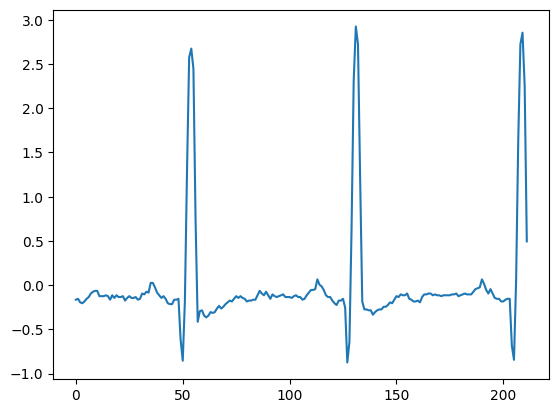

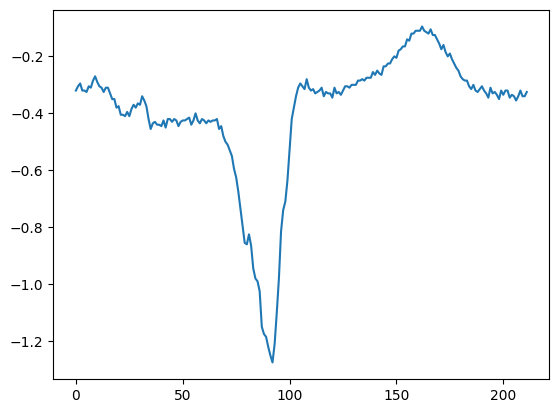

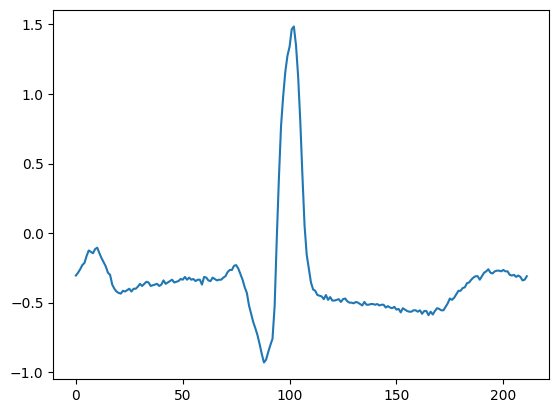

Number of NSRDB files: 18
Number of CHFDB files: 15


In [5]:
# Converting Data

# Function to convert a wfdb record to a DataFrame
def wfdb_to_dataframe(record):
    """
    Converts a wfdb record to a DataFrame.

    Parameters:
    record (wfdb.Record): The wfdb record to convert.

    Returns:
    pd.DataFrame: DataFrame containing the signal data.
    """
    df = pd.DataFrame(record.p_signal, columns=record.sig_name)
    return df

# Function to load a wfdb record and convert it to a DataFrame
def load_record(uri):
    """
    Loads a wfdb record and converts it to a DataFrame.

    Parameters:
    uri (str): URI of the wfdb record to load.

    Returns:
    pd.DataFrame: DataFrame containing the signal data.
    """
    record = wfdb.rdrecord(uri)
    return wfdb_to_dataframe(record)

# Example usage of load_record to load and plot a record
a = load_record('nsrdb/16265')
plt.plot(a['ECG1'][:212])
plt.show()

# Example usage of load_record to load and plot a different record
b = load_record('chfdb/chf03')
plt.plot(b['ECG1'][:212])
plt.show()

# Example usage of load_record to load and plot a different record
b = load_record('chfdb/chf03')
plt.plot(b['ECG2'][:212])
plt.show()

# List of all files in the 'nsrdb' directory with the '.hea' extension
nsrdb_list = glob.glob("nsrdb/*.hea")
print("Number of NSRDB files:", len(nsrdb_list))

# List of all files in the 'chfdb' directory with the '.hea' extension
chfdb_list = glob.glob("chfdb/*.hea")
print("Number of CHFDB files:", len(chfdb_list))


# Data Creation and Processing

In [6]:
# Data Creation and Processing

# Function to create a database from a list of files
def create_db(file_list, record_class, clip_duration=60, sampling_rate=212):
    """
    Create a database from a list of files.

    Parameters:
    file_list (list): List of file paths for the records.
    record_class (int): Class label for the records.
    clip_duration (int): Duration of each clip in seconds.
    sampling_rate (int): Sampling rate of the records.

    Returns:
    pd.DataFrame: DataFrame containing the database.
    """
    clip_len = sampling_rate * clip_duration
    num_channels = len(load_record(file_list[0].removesuffix('.hea')).columns)
    total_clips = sum(len(load_record(file_path.removesuffix('.hea'))) // clip_len for file_path in file_list)

    # Preallocate a NumPy array for all clips
    all_clips = np.empty((total_clips, clip_len * num_channels + 1))  # +1 for the class label

    clip_index = 0
    for file_path in file_list:
        record_df = load_record(file_path.removesuffix('.hea'))
        num_clips = len(record_df) // clip_len

        for i in range(num_clips):
            clip = record_df.iloc[i * clip_len: (i + 1) * clip_len].values.flatten()
            all_clips[clip_index, :-1] = clip  # Fill all but the last column with clip data
            all_clips[clip_index, -1] = record_class  # Last column is the class label
            clip_index += 1

    # Convert the NumPy array directly to a DataFrame
    column_names = [f't{i}' for i in range(clip_len * num_channels)] + ['class']
    df_clips = pd.DataFrame(all_clips, columns=column_names)

    return df_clips

# Create a database from 'nsrdb' records with class label 0
nsrdb_list = glob.glob("nsrdb/*.hea")
nsrdb_df = create_db(nsrdb_list, 0)
print("Shape of NSRDB DataFrame:", nsrdb_df.shape)

# Create a database from 'chfdb' records with class label 1
chfdb_list = glob.glob("chfdb/*.hea")
chfdb_df = create_db(chfdb_list, 1)
print("Shape of CHFDB DataFrame:", chfdb_df.shape)

# Concatenate the dataframes to create the full dataset
full_df = pd.concat([nsrdb_df, chfdb_df], axis=0, ignore_index=True, sort=False)
print("Shape of Full DataFrame:", full_df.shape)

# Split the dataset into features (X) and labels (y)
y_df = full_df.pop("class")
x_df = full_df

Shape of NSRDB DataFrame: (15842, 25441)
Shape of CHFDB DataFrame: (21142, 25441)
Shape of Full DataFrame: (36984, 25441)


In [7]:
full_df.head()

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t25430,t25431,t25432,t25433,t25434,t25435,t25436,t25437,t25438,t25439
0,-0.165,-0.325,-0.155,-0.325,-0.195,-0.305,-0.205,-0.305,-0.185,-0.295,...,-0.355,-0.095,-0.315,-0.085,-0.325,-0.075,-0.275,-0.075,-0.275,-0.075
1,-0.215,-0.065,-0.245,-0.115,-0.215,-0.115,-0.185,-0.125,-0.165,-0.135,...,-0.165,0.005,-0.155,-0.005,-0.155,0.005,-0.185,-0.005,-0.155,-0.015
2,-0.135,-0.005,-0.145,-0.005,-0.135,-0.005,-0.115,-0.005,-0.135,0.005,...,-0.995,0.195,-0.485,-0.185,1.245,-0.415,2.745,-0.615,2.945,-0.305
3,2.575,0.115,0.615,-0.755,-0.425,-0.925,-0.455,-0.175,-0.345,0.065,...,-0.135,-0.035,-0.135,-0.035,-0.155,-0.015,-0.175,-0.005,-0.185,-0.035
4,-0.225,-0.015,-0.195,-0.025,-0.195,-0.035,-0.225,-0.005,-0.235,-0.005,...,-0.305,-0.095,-0.285,-0.125,-0.255,-0.105,-0.265,-0.075,-0.215,-0.145


# Data Splitting

In [8]:
# Data Splitting

# Split the full dataset into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.30, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

print("Training Data:", X_train.shape)
print("Validation Data:", X_validate.shape)
print("Testing Data:", X_test.shape)

Training Data: (20710, 25440)
Validation Data: (5178, 25440)
Testing Data: (11096, 25440)


In [9]:


# # Model Definition

# input_shape = (X_train.shape[1], 1, )

# model = tf.keras.Sequential(
#     [
#         tf.keras.Input(shape=input_shape),
#         tf.keras.layers.Conv1D(20, 5),
#         tf.keras.layers.Dense(32),
#         tf.keras.layers.MaxPooling1D(2),
#         tf.keras.layers.Conv1D(80, 5),
#         tf.keras.layers.MaxPooling1D(4),
#         tf.keras.layers.Dense(32),
#         tf.keras.layers.Dense(1, activation='sigmoid'),  # Sigmoid for binary classification
#     ]
# )

# model.summary()


# Model Definition

In [10]:
input_shape = (X_train.shape[1], 1)

model = tf.keras.Sequential([
    tf.keras.Input(shape=input_shape),  # Replace 'input_shape' with the shape of your data
    tf.keras.layers.Conv1D(32, 3, activation='relu', name='conv1d_2'),
    tf.keras.layers.BatchNormalization(name='batch_normalization_2'),
    tf.keras.layers.MaxPooling1D(2, name='max_pooling1d_2'),  # Pool size of 2
    tf.keras.layers.Conv1D(64, 5, activation='relu', name='conv1d_3'),
    tf.keras.layers.BatchNormalization(name='batch_normalization_3'),
    tf.keras.layers.MaxPooling1D(2, name='max_pooling1d_3'),  # Adjusted pool size to 2
    tf.keras.layers.Conv1D(32, 5, activation='relu', name='conv1d_4'),
    tf.keras.layers.BatchNormalization(name='batch_normalization_4'),
    tf.keras.layers.MaxPooling1D(2, name='max_pooling1d_4'),  # Adjusted pool size to 2
    tf.keras.layers.Flatten(name='flatten_1'),
    tf.keras.layers.Dense(128, activation='relu', name='dense_3'),
    tf.keras.layers.Dropout(0.5, name='dropout_2'),
    tf.keras.layers.Dense(1, activation='sigmoid', name='dense_4')  # Sigmoid for binary classification
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 25438, 32)         128       
                                                                 
 batch_normalization_2 (Batc  (None, 25438, 32)        128       
 hNormalization)                                                 
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 12719, 32)        0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 12715, 64)         10304     
                                                                 
 batch_normalization_3 (Batc  (None, 12715, 64)        256       
 hNormalization)                                                 
                                                        

2023-12-10 21:07:06.134706: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1638] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13797 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:60:00.0, compute capability: 7.5
2023-12-10 21:07:06.136652: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1638] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13797 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:61:00.0, compute capability: 7.5
2023-12-10 21:07:06.138517: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1638] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 13797 MB memory:  -> device: 2, name: Tesla T4, pci bus id: 0000:da:00.0, compute capability: 7.5
2023-12-10 21:07:06.140421: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1638] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 13797 MB memory:  -> device: 3, name: Tesla T4, pci bus id: 0000:db:00.0, compute capability: 7.5


# Model Training


In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training data while validating on the dedicated validation set
history = model.fit(
    X_train, 
    y_train, 
    epochs=10, 
    validation_data=(X_validate, y_validate)  # Use the dedicated validation set
)

# Model Evaluation
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/10


2023-12-10 21:07:15.728764: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8901
2023-12-10 21:07:16.347159: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7ef830a184d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-10 21:07:16.347201: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2023-12-10 21:07:16.347207: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
2023-12-10 21:07:16.347211: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (2): Tesla T4, Compute Capability 7.5
2023-12-10 21:07:16.347215: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (3): Tesla T4, Compute Capability 7.5
2023-12-10 21:07:16.351426: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, s

648/648 [==============================] - 64s 93ms/step - loss: 0.9130 - accuracy: 0.9920 - val_loss: 0.1049 - val_accuracy: 0.9998
Epoch 2/10
648/648 [==============================] - 58s 89ms/step - loss: 0.3017 - accuracy: 0.9971 - val_loss: 0.0588 - val_accuracy: 0.9996
Epoch 3/10
648/648 [==============================] - 58s 89ms/step - loss: 0.0556 - accuracy: 0.9986 - val_loss: 0.1054 - val_accuracy: 0.9985
Epoch 4/10
648/648 [==============================] - 58s 89ms/step - loss: 0.1916 - accuracy: 0.9976 - val_loss: 0.0021 - val_accuracy: 0.9998
Epoch 5/10
648/648 [==============================] - 58s 89ms/step - loss: 0.0743 - accuracy: 0.9988 - val_loss: 0.0031 - val_accuracy: 0.9998
Epoch 6/10
648/648 [==============================] - 58s 89ms/step - loss: 0.0258 - accuracy: 0.9991 - val_loss: 0.0300 - val_accuracy: 0.9998
Epoch 7/10
648/648 [==============================] - 57s 89ms/step - loss: 0.0213 - accuracy: 0.9994 - val_loss: 5.0757e-22 - val_accuracy: 1.0000

# Model Evaluation & Results

347/347 [==============================] - 8s 23ms/step


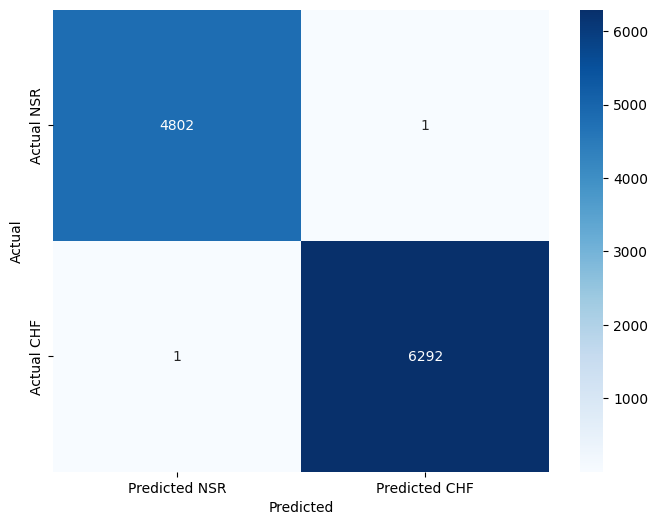

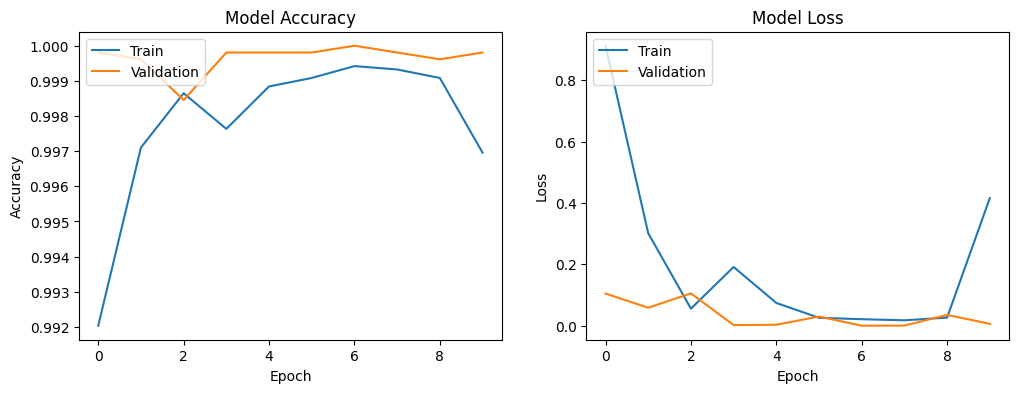

In [12]:
# Generate Predictions

y_pred_prob = model.predict(X_test)

# If y_pred_prob is 3D (e.g., (num_samples, sequence_length, 1)), reduce it to 1D
if y_pred_prob.ndim == 3:
    # Assuming the relevant prediction is the last one in the sequence
    y_pred_prob = y_pred_prob[:, -1, 0]

# Convert probabilities to class labels
y_pred = (y_pred_prob > 0.5).astype(int)

# Generate and Plot Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted NSR', 'Predicted CHF'], yticklabels=['Actual NSR', 'Actual CHF'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Plot Training and Validation Metrics

plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()